* https://stackabuse.com/python-for-nlp-creating-tf-idf-model-from-scratch/

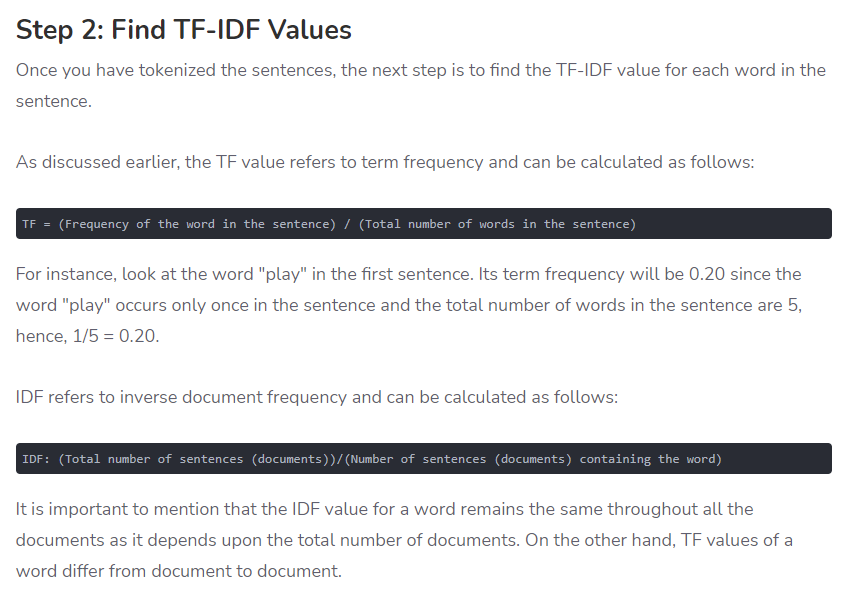

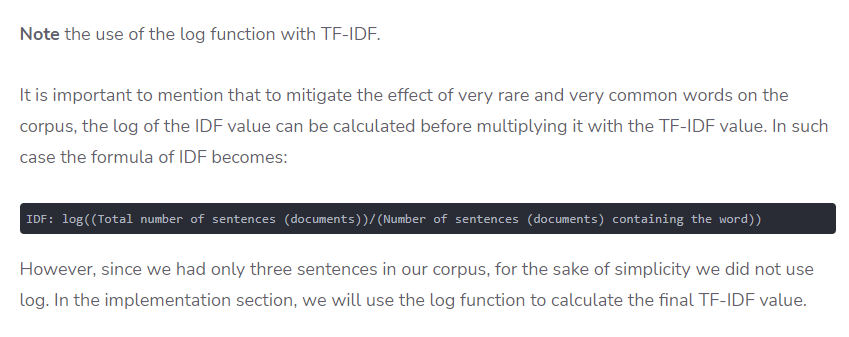

In [1]:
import nltk
# nltk.download('punkt')
import numpy as np
import pandas as pd
import random
import string

import bs4 as bs
import urllib.request
import re

raw_html = urllib.request.urlopen('https://en.wikipedia.org/wiki/Natural_language_processing')
raw_html = raw_html.read()

article_html = bs.BeautifulSoup(raw_html, 'lxml')

article_paragraphs = article_html.find_all('p')

article_text = ''

for para in article_paragraphs:
    article_text += para.text

corpus = nltk.sent_tokenize(article_text)

for i in range(len(corpus )):
    corpus [i] = corpus [i].lower()
    corpus [i] = re.sub(r'\W',' ',corpus [i])
    corpus [i] = re.sub(r'\s+',' ',corpus [i])

wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

import heapq
most_freq = heapq.nlargest(200, wordfreq, key=wordfreq.get)

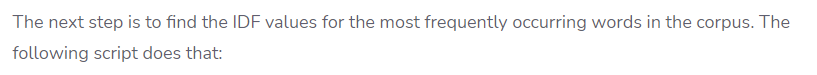

In [2]:
most_freq[:5]

['of', 'the', 'to', 'and', 'in']

In [3]:
word_idf_values = {}
for token in most_freq:
    doc_containing_word = 0
    for document in corpus:
        if token in nltk.word_tokenize(document):
            doc_containing_word += 1
    word_idf_values[token] = np.log(len(corpus)/(1 + doc_containing_word))

In [4]:
list(word_idf_values.items())[:5]

[('of', 0.31585294941847725),
 ('the', 0.3448404862917296),
 ('to', 0.6523251860396901),
 ('and', 0.8266785731844679),
 ('in', 0.8266785731844679)]

In [5]:
word_tf_values = {}
for token in most_freq:
    sent_tf_vector = []
    for document in corpus:
        doc_freq = 0
        for word in nltk.word_tokenize(document):
            if token == word:
                  doc_freq += 1
        word_tf = doc_freq/len(nltk.word_tokenize(document))
        sent_tf_vector.append(word_tf)
    word_tf_values[token] = sent_tf_vector

In [6]:
print(len(list(word_tf_values.items())[0][1]))
list(word_tf_values.items())[0]

48


('of',
 [0.05128205128205128,
  0.14285714285714285,
  0.0,
  0.0,
  0.0,
  0.038461538461538464,
  0.0392156862745098,
  0.05555555555555555,
  0.041666666666666664,
  0.10344827586206896,
  0.05,
  0.034482758620689655,
  0.0,
  0.047619047619047616,
  0.017543859649122806,
  0.09523809523809523,
  0.06666666666666667,
  0.058823529411764705,
  0.0,
  0.05263157894736842,
  0.08,
  0.046511627906976744,
  0.05555555555555555,
  0.0,
  0.0,
  0.0,
  0.07692307692307693,
  0.0,
  0.12,
  0.0,
  0.0,
  0.058823529411764705,
  0.1111111111111111,
  0.04,
  0.0,
  0.0,
  0.058823529411764705,
  0.10256410256410256,
  0.14285714285714285,
  0.05263157894736842,
  0.07142857142857142,
  0.05555555555555555,
  0.10526315789473684,
  0.06779661016949153,
  0.05172413793103448,
  0.08695652173913043,
  0.058823529411764705,
  0.0])

In [7]:
tfidf_values = []
for token in word_tf_values.keys():
    tfidf_sentences = []
    for tf_sentence in word_tf_values[token]:
        tf_idf_score = tf_sentence * word_idf_values[token]
        tfidf_sentences.append(tf_idf_score)
    tfidf_values.append(tfidf_sentences)

In [8]:
tf_idf_model = np.asarray(tfidf_values)

In [9]:
pd.DataFrame(tf_idf_model)

,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,0.016198,0.045122,0.000000,0.000000,0.000000,0.012148,0.012386,0.017547,0.013161,0.032674,...,0.045122,0.016624,0.022561,0.017547,0.033248,0.021414,0.016337,0.027465,0.018580,0.0
1,0.008842,0.065684,0.047024,0.000000,0.038316,0.019895,0.020285,0.019158,0.028737,0.035673,...,0.024631,0.036299,0.049263,0.000000,0.036299,0.029224,0.011891,0.014993,0.000000,0.0
2,0.033453,0.000000,0.000000,0.000000,0.000000,0.000000,0.012791,0.036240,0.000000,0.022494,...,0.000000,0.034333,0.000000,0.000000,0.000000,0.011056,0.011247,0.028362,0.038372,0.0
3,0.063591,0.000000,0.075153,0.051667,0.000000,0.031795,0.016209,0.000000,0.000000,0.028506,...,0.000000,0.087019,0.059048,0.091853,0.000000,0.000000,0.014253,0.000000,0.000000,0.0
4,0.021197,0.000000,0.037576,0.051667,0.091853,0.015898,0.000000,0.000000,0.068890,0.028506,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028506,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.000000,0.151336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
196,0.000000,0.000000,0.144457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
197,0.000000,0.000000,0.144457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
198,0.000000,0.000000,0.144457,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
